In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os, glob
import seaborn as sns
from scipy.optimize import curve_fit
plt.style.use("ggplot")
cm = 1/2.54

In [2]:
t1F0 = pd.read_csv(\
'/home/nitta/Documents/sam/ACTIN-MYOSIN/2021/actinmyosin2/Analysis/Pull_Push/data/tip/TipXYF1.0t3S27.txt',\
names=['t','x','y'], delim_whitespace=True)

In [3]:
conff0 = glob.glob('data/Conformation_A001f0s**.txt')
conff0 = sorted(conff0)
conff1 = glob.glob('data/Conformation_A001f1s**.txt')
conff1 = sorted(conff1)

In [4]:
conff1

['data/Conformation_A001f1s27.txt',
 'data/Conformation_A001f1s28.txt',
 'data/Conformation_A001f1s29.txt',
 'data/Conformation_A001f1s30.txt']

In [5]:
beads = 13; 
#jmp = 5 ; dt = 'dt05'; Dt = 0.05
jmp = 10 ; dt = 'dt1'; Dt = 0.1
#jmp = 20 ; dt = 'dt2'; Dt = 0.2
#jmp = 30 ; dt = 'dt3'; Dt = 0.3
#jmp = 50 ; dt = 'dt5'; Dt = 0.5
v0 = 7.2; v1 = 7.8

conf0 = []; conf1 = []; xdiff0 = []; ydiff0 = []; xdiff1 = []; ydiff1 = []; bf0 = []; bf1 = []

for i in conff0:
    _ = pd.read_csv(i, names=['t','x','y','z'], delim_whitespace=True)
    _ = _[0::beads]
    _ = _[0::jmp]
    conf0.append(_)
    xdiff0.append(np.diff(_['x']))
    ydiff0.append(np.diff(_['y']))
    
for j in conff1:
    _ = pd.read_csv(j, names=['t','x','y','z'], delim_whitespace=True)
    _ = _[0::beads]
    _ = _[0::jmp]
    conf1.append(_)
    xdiff1.append(np.diff(_['x']))
    ydiff1.append(np.diff(_['y']))


$|b_1| = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$

$U_{b1} = \frac{1}{|b_1|} \times ((x_2-x_1), (y_2-y_1))$

In [2]:
fnm = "toSam_2021-07-19/from2015-05-05/MD5000_10sec_1_PC5_0429run/SkippedTipXY_A001.txt"
fnmc = "toSam_2021-07-19/from2015-05-05/MD5000_10sec_1_PC5_0429run/AveCos.txt"

In [3]:
tip_ = pd.read_csv(fnm, names=['x','y'], delim_whitespace=True)
tipc = pd.read_csv(fnmc, names=['s','ac'], delim_whitespace=True)

In [4]:
xtdf_ = np.diff(tip_['x'])
ytdf_ = np.diff(tip_['y'])

In [6]:
ubx0 = []; uby0 = []
ubx1 = []; uby1 = []

for i in range(len(xdiff0)):
    b0 = np.sqrt(xdiff0[i]**2 + ydiff0[i]**2)
    ubx0.append(xdiff0[i]/b0)
    uby0.append(ydiff0[i]/b0)

for j in range(len(xdiff1)):
    b1 = np.sqrt(xdiff1[j]**2 + ydiff1[j]**2)
    ubx1.append(xdiff1[j]/b1)
    uby1.append(ydiff1[j]/b1)

In [5]:
tp_b0 = np.sqrt(xtdf_**2 + ytdf_**2)
tp_ubx0 = (xtdf_/tp_b0)
tp_uby0 = (ytdf_/tp_b0)

tp_ub0 = pd.DataFrame({'ubx':tp_ubx0, 'uby':tp_uby0})

In [6]:
_ = []; ds0 = []; dsm0 = []; s0 = []; c = 0; ds0_ = []; dsm_ = []; s_ = []
    
for i in range(len(tp_ub0)):
    for j in range(len(tp_ub0)):
        try:
            _.append(np.dot(tp_ub0.loc[j].values,tp_ub0.loc[j+i].values))
        except:
            pass #print("No: Ub%s.Ub%s"%(j,j+i))
    ds0_.append(_) # not necessary to save or is it?
    dsm_.append(np.mean(_))
    s_.append(c)
    _ = [] # empty this bucket
    c+=1
s0=(s_)
dsm0=(dsm_)
ds0=(ds0_)
#c = 0; ds0_ = []; dsm_ = []; s_ = [] # reset stuff

s0 = np.array(s0)
#ds0 = np.array(ds0)
dsm0 = np.array(dsm0)

In [7]:
dsm0

array([ 1.        ,  0.88162602,  0.76787261,  0.70528428,  0.6687702 ,
        0.6135903 ,  0.53273985,  0.44141746,  0.39071603,  0.36754704,
        0.36481461,  0.3463414 ,  0.30846337,  0.26614312,  0.2491751 ,
        0.2564866 ,  0.22947566,  0.16603386,  0.09405442,  0.04117336,
        0.02460335, -0.00535774, -0.03366668, -0.06900681, -0.08341977,
       -0.10477268, -0.13574951, -0.13951079, -0.17081646, -0.1967685 ,
       -0.2286409 , -0.24030215, -0.23104568, -0.24374322, -0.32164577,
       -0.37498548, -0.41049984, -0.44500618, -0.49457349, -0.54811655,
       -0.6142577 , -0.66608608, -0.68510613, -0.67679955, -0.62031493,
       -0.59994669, -0.58213649, -0.51331228, -0.42161146, -0.35047973,
       -0.32432781, -0.30009301, -0.24791759, -0.19258488, -0.11869311,
       -0.10989205, -0.11353099, -0.0856818 , -0.03198236,  0.00698882,
        0.04424675,  0.09371917,  0.12733159,  0.15446066,  0.20171984,
        0.23601252,  0.23653075,  0.21727859,  0.22898019,  0.30

In [8]:
s0

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

In [9]:
i = 3; 
x = s0 #m[i]['s0m']
y = dsm0 #[i]['dsm0']
y = np.log(y)
y = y[~np.isnan(y)]
x = x[:y.shape[0]]
x = x[:-44]
y = y[:-44]

/home/nitta/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [10]:
def func(x,Lp):
    return 1*(-x/(2*Lp))
popt, pcov = curve_fit(func, x, y)


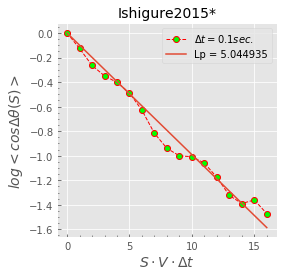

In [13]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm), sharey=True)

ax.plot(x,y, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime', label=r'$\Delta t = 0.1 sec.$')
ax.plot(x, func(x,*popt), label='Lp = %s'%np.round(popt[0],6))

ax.minorticks_on()
ax.tick_params(which='both', direction='in')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$log <cos \Delta \theta (S) >$', fontsize=14)
ax.set_title('Ishigure2015*', fontsize=14)
ax.legend()

#plt.savefig('fig/Ishigure2015.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [14]:
i = 3; 
x = tipc['s']*6*0.1
y = tipc['ac']
y = np.log(y)
y = y[~np.isnan(y)]
x = x[:y.shape[0]]
x = x[:-5]
y = y[:-5]

/home/nitta/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
/home/nitta/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [15]:
x

0     0.00
1     0.06
2     0.12
3     0.18
4     0.24
5     0.30
6     0.36
7     0.42
8     0.48
9     0.54
10    0.60
11    0.66
12    0.72
13    0.78
14    0.84
15    0.90
Name: s, dtype: float64

In [16]:
def func(x,Lp):
    return 1*(-x/(2*Lp))
popt, pcov = curve_fit(func, x, y)


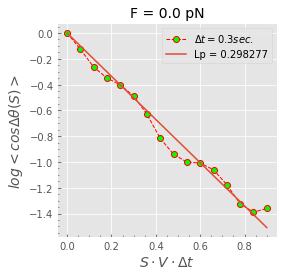

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm), sharey=True)

ax.plot(x,y, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime', label=r'$\Delta t = 0.3 sec.$')
ax.plot(x, func(x,*popt), label='Lp = %s'%np.round(popt[0],6))

ax.minorticks_on()
ax.tick_params(which='both', direction='in')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$log <cos \Delta \theta (S) >$', fontsize=14)
ax.set_title('F = 0.0 pN', fontsize=14)
ax.legend()

#plt.savefig('fig/R1LpDt3-F0-1.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [7]:
ub0 = []; ub1 = []

for i in range(len(ubx0)):
    ub0.append(pd.DataFrame({'ubx':ubx0[i], 'uby':uby0[i]}))
    
for j in range(len(ubx1)):
    ub1.append(pd.DataFrame({'ubx':ubx1[j], 'uby':uby1[j]}))

for $\Delta s = 1$, calculate $<cos \Delta \theta(1)>$: <br>
mean of $Ub_1\cdot Ub_{1+1} + Ub_2\cdot Ub_{2+1} + Ub_3\cdot Ub_{3+1} + \cdots + Ub_{L-1}\cdot Ub_L$ <br>

for $\Delta s = 2$, calculate $<cos \Delta \theta(2)>$: <br>
mean of $Ub_1\cdot Ub_{1+2} + Ub_2\cdot Ub_{2+2} + Ub_3\cdot Ub_{3+2} + \cdots + Ub_{L-2}\cdot Ub_L$ <br>

Persistence length = plot(s,mean of Ubs)

In [8]:
_ = []; ds0 = []; dsm0 = []; s0 = []; c = 0; ds0_ = []; dsm_ = []; s_ = []

# try:
#     os.remove('ds_ub_status.txt')
# except:
#     print("'ds_ub_status.txt' does not exist.")
    
for h in range(len(ub0)):
    for i in range(len(ub0[h])-1):
#         print("Ds = %s"%i, file=open('ds_ub_status.txt','a'))
        for j in range(len(ub0[h])-1):
            try:
                _.append(np.dot(ub0[h].loc[j].values,ub0[h].loc[j+i].values))
#                 print("Ub%s.Ub%s"%(j,j+i), file=open('ds_ub_status.txt','a'))
            except:
                pass #print("No: Ub%s.Ub%s"%(j,j+i))
        ds0_.append(_) # not necessary to save or is it?
        dsm_.append(np.mean(_))
        s_.append(c)
        _ = [] # empty this bucket
        c+=1
    s0.append(s_)
    dsm0.append(dsm_)
    ds0.append(ds0_)
    c = 0; ds0_ = []; dsm_ = []; s_ = [] # reset stuff

s0 = np.array(s0)
#ds0 = np.array(ds0)
dsm0 = np.array(dsm0)

In [9]:
_ = []; ds1 = []; dsm1 = []; s1 = []; c = 0; ds1_ = []; dsm_ = []; s_ = []

# try:
#     os.remove('ds_ub_status.txt')
# except:
#     print("'ds_ub_status.txt' does not exist.")
    
for h in range(len(ub1)):
    for i in range(len(ub1[h])-1):
#         print("Ds = %s"%i, file=open('ds_ub_status.txt','a'))
        for j in range(len(ub1[h])-1):
            try:
                _.append(np.dot(ub1[h].loc[j].values,ub1[h].loc[j+i].values))
#                 print("Ub%s.Ub%s"%(j,j+i), file=open('ds_ub_status.txt','a'))
            except:
                pass #print("No: Ub%s.Ub%s"%(j,j+i))
        ds1_.append(_) # not necessary to save
        dsm_.append(np.mean(_))
        s_.append(c)
        _ = [] # empty this bucket
        c+=1
    s1.append(s_)
    dsm1.append(dsm_)
    ds1.append(ds1_)
    c = 0; ds1_ = []; dsm_ = []; s_ = [] # reset stuff

s1 = np.array(s1)
#ds1 = np.array(ds1)
dsm1 = np.array(dsm1)

In [10]:
len(ds1[0])

29

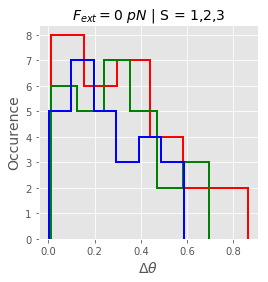

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10*cm,10*cm))

bins = np.arange(0,1,0.025)
c = ['k','r','g','b']
alp = [1,0.7,0.7,0.1]

for i in range(1,4):
    ax.hist(np.arccos(ds1[0][i]), color=c[i], bins='sturges', edgecolor=c[i], lw=2, histtype='step') #, alpha=alp[i])
ax.set_xlabel(r"$\Delta \theta$", fontsize=14)
ax.set_ylabel("Occurence", fontsize=14)
ax.set_title("$F_{ext} = 0\ pN$ | S = 1,2,3", fontsize=14)

#plt.savefig('fig/R1LpNoFitF0hist.pdf', format='pdf', bbox_inches='tight')
plt.show()

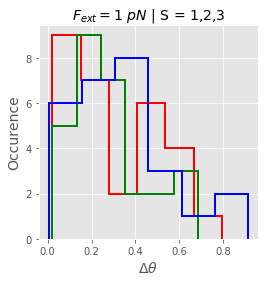

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10*cm,10*cm))

bins = np.arange(0,1,0.025)
c = ['k','r','g','b']

for i in range(1,4):
    ax.hist(np.arccos(ds1[1][i]), color=c[i], bins='sturges', edgecolor=c[i], lw=2, histtype='step')
ax.set_xlabel(r"$\Delta \theta$", fontsize=14)
ax.set_ylabel("Occurence", fontsize=14)
ax.set_title("$F_{ext} = 1\ pN$ | S = 1,2,3", fontsize=14)

#plt.savefig('fig/R1LpNoFitF1hist.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [14]:
dfs0 = pd.DataFrame({'s00':s0[0], 's01':s0[1], 's02':s0[2], 's03':s0[3]})
dfdsm0 = pd.DataFrame({'dsm00':dsm0[0], 'dsm01':dsm0[1], 'dsm02':dsm0[2], 'dsm03':dsm0[3]})

s0_m = dfs0.mean(axis=1)*v0*Dt
s0_m.to_csv('data/s0_m'+dt+'.csv', index=False)
dsm0_m = dfdsm0.mean(axis=1)
dsm0_m.to_csv('data/dsm0_m'+dt+'.csv', index=False)

dfs1 = pd.DataFrame({'s10':s1[0], 's11':s1[1], 's12':s0[2], 's13':s1[3]})
dfdsm1 = pd.DataFrame({'dsm10':dsm1[0], 'dsm11':dsm1[1], 'dsm12':dsm1[2], 'dsm13':dsm1[3]})

s1_m = dfs1.mean(axis=1)*v1*Dt
s1_m.to_csv('data/s1_m'+dt+'.csv', index=False)
dsm1_m = dfdsm1.mean(axis=1)
dsm1_m.to_csv('data/dsm1_m'+dt+'.csv', index=False)

/home/nitta/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [18]:
s0_

['data/s0_mdt05.csv',
 'data/s0_mdt1.csv',
 'data/s0_mdt2.csv',
 'data/s0_mdt3.csv',
 'data/s0_mdt5.csv']

In [19]:
s0_ = glob.glob('data/s0_mdt**.csv')
s0_ = sorted(s0_)
s1_ = glob.glob('data/s1_mdt**.csv')
s1_ = sorted(s1_)
dsm0_ = glob.glob('data/dsm0_mdt**.csv')
dsm0_ = sorted(dsm0_)
dsm1_ = glob.glob('data/dsm1_mdt**.csv')
dsm1_ = sorted(dsm1_)

In [20]:
s0m = []; s1m = []; dsm0 = []; dsm1 = []

for i in s0_:
    _ = pd.read_csv(i, names=['s0m'])
    s0m.append(_)
    
for j in s1_:
    _ = pd.read_csv(j, names=['s1m'])
    s1m.append(_)
    
for k in dsm0_:
    _ = pd.read_csv(k, names=['dsm0'])
    dsm0.append(_)
    
for l in dsm1_:
    _ = pd.read_csv(l, names=['dsm1'])
    dsm1.append(_)

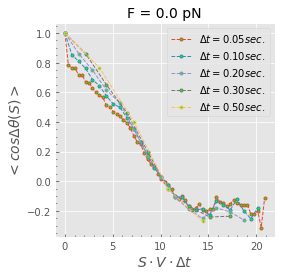

In [21]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

dts = [0.05,0.1,0.2,0.3,0.5]; c=0

for i in range(len(s0m)):
    ax.plot(s0m[i],dsm0[i], marker='o', markersize=3, ls='--', lw=1, markerfacecolor='lime', label=r'$\Delta t = %.2f sec.$'%dts[c])
    c+=1
ax.minorticks_on()
ax.tick_params(which='both', direction='in')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$<cos \Delta \theta (S) >$', fontsize=14)
ax.set_title('F = 0.0 pN', fontsize=14)
plt.legend()

#plt.savefig('fig/R1LpNoFitF0dtAll.pdf', format='pdf', bbox_inches='tight')
plt.show()

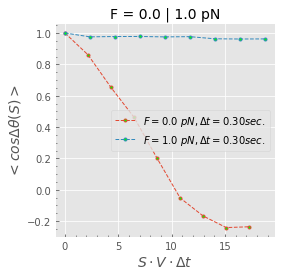

In [44]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

dts = [0.05,0.1,0.2,0.3,0.5]; c=0

#for i in range(len(s0m)):
ax.plot(s0m[3],dsm0[3], marker='o', markersize=3, ls='--', lw=1, markerfacecolor='lime', label=r'$F=0.0\ pN,\Delta t = %.2f sec.$'%dts[3])
ax.plot(s1m[3],dsm1[3], marker='o', markersize=3, ls='--', lw=1, markerfacecolor='lime', label=r'$F=1.0\ pN,\Delta t = %.2f sec.$'%dts[3])
#    c+=1
ax.minorticks_on()
ax.tick_params(which='both', direction='in')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$<cos \Delta \theta (S) >$', fontsize=14)
ax.set_title('F = 0.0 | 1.0 pN', fontsize=14)
plt.legend()

#plt.savefig('fig/R1LpNoFitF0dt03.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [55]:
x_ =  s0m[3]['s0m'][:-3]; y_ =  dsm0[3]['dsm0'][:-3]

def func(x_,Lp):
    return np.exp(-x_/(2*Lp))

popt, pcov = curve_fit(func, x_, y_)

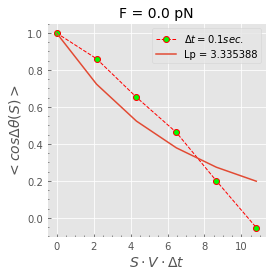

In [56]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(x_,y_, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime', label=r'$\Delta t = 0.1 sec.$')
ax.plot(x_, func(x_,*popt), label='Lp = %s'%np.round(popt[0],6))

ax.minorticks_on()
ax.tick_params(which='both', direction='in')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$<cos \Delta \theta (S) >$', fontsize=14)
ax.set_title('F = 0.0 pN', fontsize=14)
plt.legend()

#plt.savefig('fig/R1LpDt1.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [59]:
x_ =  s1m[3]['s1m']; y_ =  dsm1[3]['dsm1']

def func(x_,Lp):
    return np.exp(-x_/(2*Lp))

popt, pcov = curve_fit(func, x_, y_)

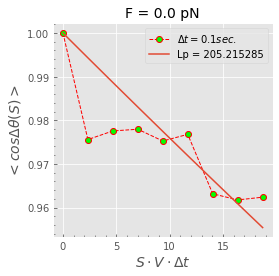

In [60]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(x_,y_, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime', label=r'$\Delta t = 0.1 sec.$')
ax.plot(x_, func(x_,*popt), label='Lp = %s'%np.round(popt[0],6))

ax.minorticks_on()
ax.tick_params(which='both', direction='in')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$<cos \Delta \theta (S) >$', fontsize=14)
ax.set_title('F = 0.0 pN', fontsize=14)
plt.legend()

#plt.savefig('fig/R1LpDt1.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [114]:
i = 3; 
x = s0m[i]['s0m']
y = dsm0[i]['dsm0']
y = np.log(y).dropna()
x = x[:y.shape[0]]
x = x[:-2]
y = y[:-2]

i1 = 3
x1 = s1m[i1]['s1m']
y1 = dsm1[i1]['dsm1']
y1 = np.log(y1).dropna()
x1 = x1[:y1.shape[0]]
x1 = x1[:-4]
y1 = y1[:-4]

/home/nitta/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [115]:
def func(x,Lp):
    return 1*(-x/(2*Lp))
popt, pcov = curve_fit(func, x, y)

def func1(x1,Lp1):
    return 1*(-x1/(2*Lp1))
popt1, pcov1 = curve_fit(func1, x1, y1)

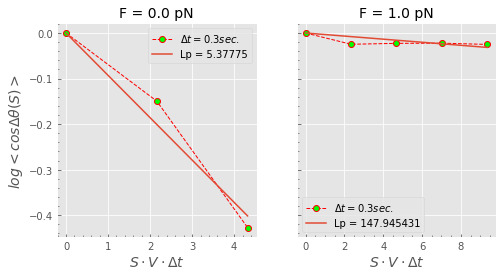

In [118]:
fig, ax = plt.subplots(1,2, figsize=(20*cm,10*cm), sharey=True)

ax[0].plot(x,y, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime', label=r'$\Delta t = 0.3 sec.$')
ax[0].plot(x, func(x,*popt), label='Lp = %s'%np.round(popt[0],6))

ax[0].minorticks_on()
ax[0].tick_params(which='both', direction='in')

ax[0].set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax[0].set_ylabel(r'$log <cos \Delta \theta (S) >$', fontsize=14)
ax[0].set_title('F = 0.0 pN', fontsize=14)
ax[0].legend()

ax[1].plot(x1,y1, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime', label=r'$\Delta t = 0.3 sec.$')
ax[1].plot(x1, func1(x1,*popt1), label='Lp = %s'%np.round(popt1[0],6))

ax[1].minorticks_on()
ax[1].tick_params(which='both', direction='in')

ax[1].set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
#ax[1].set_ylabel(r'$log <cos \Delta \theta (S) >$', fontsize=14)
ax[1].set_title('F = 1.0 pN', fontsize=14)
ax[1].legend()

#plt.savefig('fig/R1LpDt3-F0-1.pdf', format='pdf', bbox_inches='tight')
plt.show()

/home/nitta/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


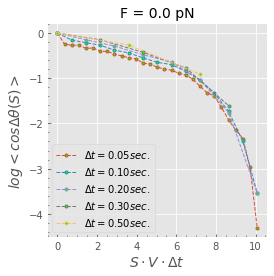

In [36]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

dts = [0.05,0.1,0.2,0.3,0.5]; c=0

for i in range(len(s0m)):
    ax.plot(s0m[i],np.log(dsm0[i]), marker='o', markersize=3, ls='--', lw=1, markerfacecolor='lime', label=r'$\Delta t = %.2f sec.$'%dts[c])
    c+=1
ax.minorticks_on()
ax.tick_params(which='both', direction='in')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$log<cos \Delta \theta (S) >$', fontsize=14)
ax.set_title('F = 0.0 pN', fontsize=14)
plt.legend()

#plt.savefig('fig/R1LpNoFitF0dtAll.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [37]:
def func(s,Lp):
    return (-sm0[0]/(2*Lp))

popt, pcov = curve_fit(func, s0m[0], np.log(dsm0[0]))

/home/nitta/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


ValueError: array must not contain infs or NaNs

In [38]:
len(s0m[0]), len(np.log(dsm0[0]) )

/home/nitta/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


(59, 59)

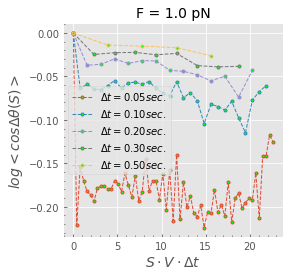

In [39]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

dts = [0.05,0.1,0.2,0.3,0.5]; c=0

for i in range(len(s1m)):
    ax.plot(s1m[i],np.log(dsm1[i]), marker='o', markersize=3, ls='--', lw=1, markerfacecolor='lime', label=r'$\Delta t = %.2f sec.$'%dts[c])
    c+=1
ax.minorticks_on()
ax.tick_params(which='both', direction='in')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$log <cos \Delta \theta (S) >$', fontsize=14)
ax.set_title('F = 1.0 pN', fontsize=14)
plt.legend()

#plt.savefig('fig/R1LpNoFitF1dtAll.pdf', format='pdf', bbox_inches='tight')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (29,) and (59, 1)

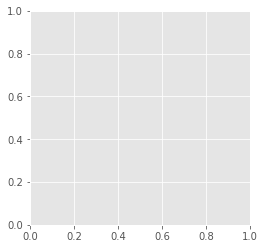

In [40]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

for i in range(len(s0)):
    ax.plot(s0[i],dsm0[i], marker='o', markersize=5, c='r', ls='--', lw=1, markerfacecolor='lime')
ax.plot(s0_m,dsm0_m, marker='o', markersize=5, c='b', ls='--', lw=1, markerfacecolor='lightblue')
ax.minorticks_on()
ax.tick_params(which='both', direction='in')

ax.set_xlabel(r'$S$', fontsize=14)
ax.set_ylabel(r'$<cos \Delta \theta (S) >$', fontsize=14)
#ax.set_title('F = 0.0 pN, $\Delta t = 0.05 sec.$', fontsize=14)
#ax.set_title('F = 0.0 pN, $\Delta t = 0.1 sec.$', fontsize=14)
#ax.set_title('F = 0.0 pN, $\Delta t = 0.2 sec.$', fontsize=14)
ax.set_title('F = 0.0 pN, $\Delta t = 0.3 sec.$', fontsize=14)

#plt.savefig('fig/R1LpNoFitF0dt05.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/R1LpNoFitF0dt1.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/R1LpNoFitF0dt2.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/R1LpNoFitF0dt3.pdf', format='pdf', bbox_inches='tight')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (29,) and (59, 1)

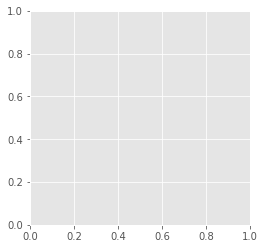

In [41]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

for i in range(len(s1)):
    ax.plot(s1[i],dsm1[i], marker='o', markersize=5, c='r', ls='--', lw=1, markerfacecolor='lime')
ax.plot(s1_m,dsm1_m, marker='o', markersize=5, c='b', ls='--', lw=1, markerfacecolor='lightblue')
ax.minorticks_on()
ax.tick_params(which='both', direction='in')

ax.set_xlabel(r'$S$', fontsize=14)
ax.set_ylabel(r'$<cos \Delta \theta (S) >$', fontsize=14)
#ax.set_title('F = 1.0 pN, $\Delta t = 0.05 sec.$', fontsize=14)
#ax.set_title('F = 1.0 pN, $\Delta t = 0.1 sec.$', fontsize=14)
#ax.set_title('F = 1.0 pN, $\Delta t = 0.2 sec.$', fontsize=14)
ax.set_title('F = 1.0 pN, $\Delta t = 0.3 sec.$', fontsize=14)

#plt.savefig('fig/R1LpNoFitF1dt05.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/R1LpNoFitF1dt1.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/R1LpNoFitF1dt2.pdf', format='pdf', bbox_inches='tight')
plt.savefig('fig/R1LpNoFitF1dt3.pdf', format='pdf', bbox_inches='tight')

plt.show()

$<cos \Delta \theta> = exp(-\frac{s}{2Lp})$

In [72]:
def func(s50,Lp):
    return np.exp(-s50/(2*Lp))

popt, pcov = curve_fit(func, s50, dsm50)

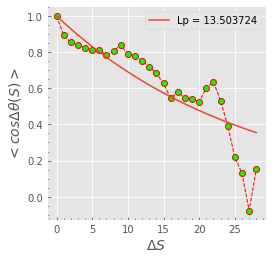

In [73]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(s50,dsm50, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime')
ax.plot(s50, func(s50,*popt), label='Lp = %s'%np.round(popt[0],6))

ax.minorticks_on()
ax.tick_params(which='both', direction='in')

ax.set_xlabel(r'$S$', fontsize=14)
ax.set_ylabel(r'$<cos \Delta \theta (S) >$', fontsize=14)
plt.legend()

#plt.savefig('fig/R1Lpx.pdf', format='pdf', bbox_inches='tight')
plt.show()